Tecnologias               0
Salario Promedio (USD)    0
dtype: int64

Análisis del Modelo de Regresión Lineal:
- La pendiente del modelo (coeficiente) es: -869.43
- El intercepto del modelo es: 92484.97

Interpretación del comportamiento:
- El modelo muestra una relación entre el ranking de popularidad y el salario promedio de las tecnologías.
- El coeficiente de la pendiente (-869.43) sugiere que a medida que aumenta el ranking (menos popularidad), el salario promedio tiende a disminuir.
- El intercepto (92484.97) indica el valor estimado del salario cuando el ranking es 0, lo cual no es aplicable en el contexto real, pero es una estimación del modelo.

Análisis más detallado:
- La tecnología con mayor salario promedio es Erlang ($100636).
- La tecnología con menor salario promedio es Ada ($42584).
- La regresión muestra una disminución progresiva en el salario promedio a medida que disminuye el ranking.
- El análisis sugiere que existe una correlación negativa entre el ranking y el s

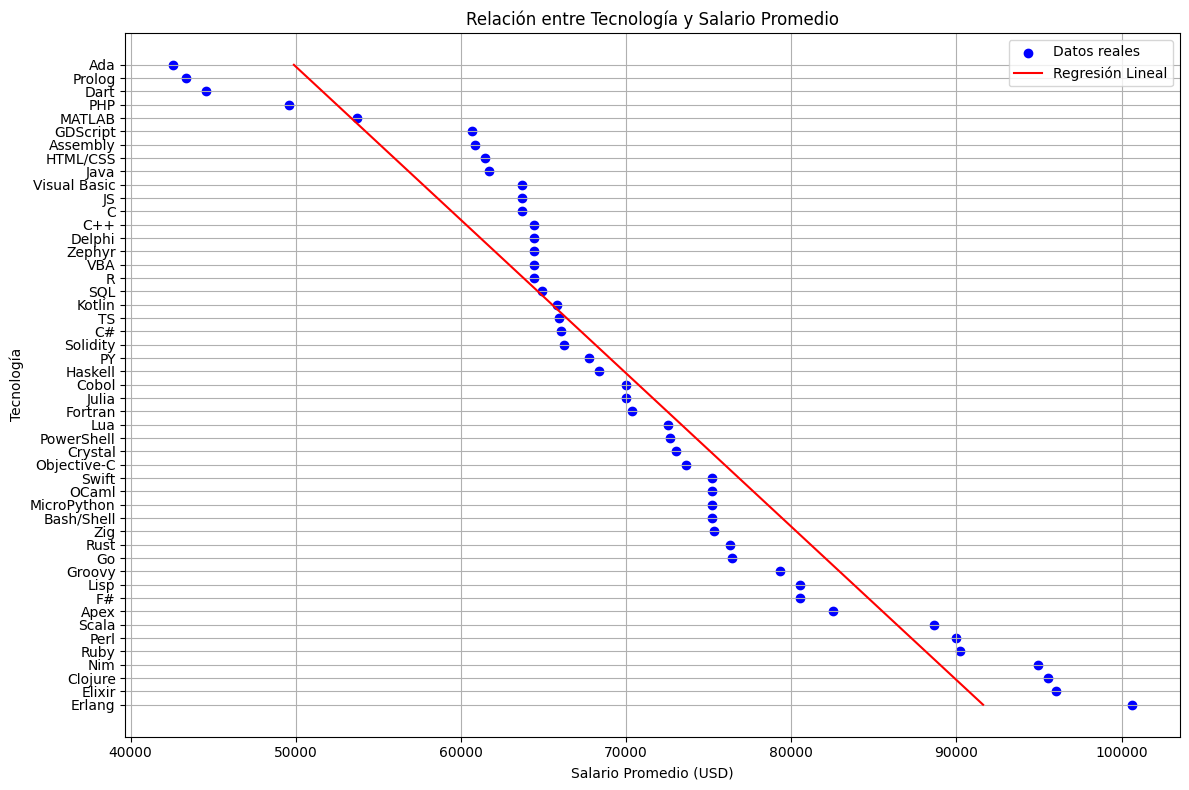

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Leer el archivo CSV con el separador ','
archivo_csv = "TecnologiasMejorPagas.csv"  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa
df = pd.read_csv(archivo_csv, sep=",")

# Verificar si hay valores NaN en las columnas
print(df.isnull().sum())

# Ordenar los datos por "Salario Promedio (USD)" en orden descendente
df = df.sort_values(by="Salario Promedio (USD)", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Crear variables independientes y dependientes para el modelo
X = df[["Ranking"]].values
y = df["Salario Promedio (USD)"].values

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Analizar el modelo
pendiente = model.coef_[0]
intercepto = model.intercept_

# Imprimir análisis del modelo
print("\nAnálisis del Modelo de Regresión Lineal:")
print(f"- La pendiente del modelo (coeficiente) es: {pendiente:.2f}")
print(f"- El intercepto del modelo es: {intercepto:.2f}")
print("\nInterpretación del comportamiento:")
print(f"- El modelo muestra una relación entre el ranking de popularidad y el salario promedio de las tecnologías.")
print(f"- El coeficiente de la pendiente ({pendiente:.2f}) sugiere que a medida que aumenta el ranking (menos popularidad), el salario promedio tiende a disminuir.")
print(f"- El intercepto ({intercepto:.2f}) indica el valor estimado del salario cuando el ranking es 0, lo cual no es aplicable en el contexto real, pero es una estimación del modelo.")

# Análisis más detallado según los datos
top_tecnologia = df.iloc[0]["Tecnologias"]
top_salario = df.iloc[0]["Salario Promedio (USD)"]
bottom_tecnologia = df.iloc[-1]["Tecnologias"]
bottom_salario = df.iloc[-1]["Salario Promedio (USD)"]

# Imprimir análisis más detallado
print("\nAnálisis más detallado:")
print(f"- La tecnología con mayor salario promedio es {top_tecnologia} (${top_salario}).")
print(f"- La tecnología con menor salario promedio es {bottom_tecnologia} (${bottom_salario}).")
print(f"- La regresión muestra una disminución progresiva en el salario promedio a medida que disminuye el ranking.")
print(f"- El análisis sugiere que existe una correlación negativa entre el ranking y el salario promedio. Esto puede reflejar el hecho de que las tecnologías menos populares tienen salarios más bajos.")

# Configurar el gráfico con los nombres de las tecnologías en el eje Y
plt.figure(figsize=(12, 8))
plt.scatter(df["Salario Promedio (USD)"], df["Tecnologias"], color="blue", label="Datos reales")
plt.plot(y_pred, df["Tecnologias"], color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Salario Promedio (USD)")
plt.ylabel("Tecnología")
plt.title("Relación entre Tecnología y Salario Promedio")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()